# Q-learning with Gridworld

## Goal:

- Implement Q-learning

In [121]:
import gym
import chula_rl as rl
import os
import numpy as np
import random
from collections import deque, defaultdict
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Make Env

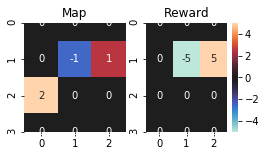

In [122]:
def make_env():
    env = rl.env.Gridworld(shape=(4, 3),
                           start=(2, 0),
                           goal=(1, 2),
                           move_reward=-1)
    env = rl.env.wrapper.ClipEpisodeLength(env, n_max_length=20)
    env = rl.env.wrapper.EpisodeSummary(env)
    return env


env = make_env()
env.reset()
env.render()

## Step 2: Define policy

Define Q-learning agent with epsilon greedy. We have defined the epsilon greedy for you. Use `rl.policy.wrapper.EpsilonGreedy`.

In [150]:
class QlearningPolicy(rl.policy.BasePolicy):

    def __init__(self, lr, discount_factor, observation_space, n_action):
        self.lr = lr
        self.discount_factor = discount_factor
        self.observation_space = observation_space
        self.n_action = n_action

        self.q = np.zeros(list(self.observation_space.high) +
                          [n_action])  # (s0, s1, a)

    def step(self, state):
        # code here ...
        #policy = rl.policy.wrapper.EpsilonGreedy(self,0.1,self.n_action)
        #return policy.step(state)
        return np.argmax(self.q[tuple(state)])

    def optimize_step(self, data):
        s, a, r, ss, done = data['s'], data['a'], data['r'], data['ss'], data[
            'done']
        # code here ...
        current_state = (s[0],s[1],a)
        next_action = self.step(ss)
        next_state = (ss[0],ss[1],next_action)
        self.q[current_state] = self.q[current_state] + self.lr*(r + self.discount_factor*self.q[next_state] - self.q[current_state])

## Step 3: Define an explorer

we have `OneStepExplorer` for you, try to make use of it. It will run a policy for one step, return the result immediately.

It will return:

```
{
    's': current state,
    'a': action,
    'r': reward,
    'ss': next state,
    'aa': next action,
    'done': is done?,
}
```

## Running the algorithm

In [151]:
def run(policy, n_max_interaction):
    rl.util.set_seed(0) # predictable results
    env = make_env()
    explorer = rl.explorer.OneStepExplorer(n_max_interaction=n_max_interaction, env=env)

    while True:
        try:
            data = explorer.step(policy)
            #print(data)
            policy.optimize_step(data)  # not defined
        except rl.exception.InteractionExceeded:
            break
    df = pd.DataFrame(explorer.get_hist())
    return df

max: 2


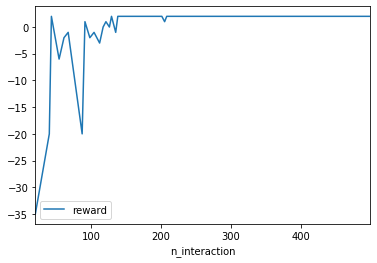

In [164]:
policy = QlearningPolicy(lr=0.1,
                         discount_factor=0.99,
                         observation_space=env.observation_space,
                         n_action=env.action_space.n)
policy = rl.policy.wrapper.EpsilonGreedy(policy,0.001,env.action_space.n)
stats = run(policy, 500)
print('max:', stats['reward'].max())
stats.plot(x='n_interaction', y='reward')

Expeceted result: max of 2 reward.

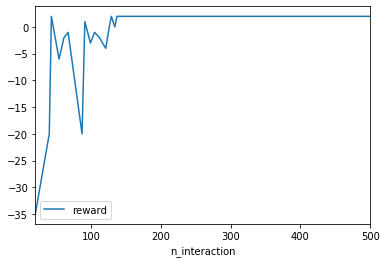